🏘️ Exercise : Ames Housing Price Prediction

🎯 Tasks:
Load the dataset using pandas.

Handle missing values properly (drop or fill).

Encode categorical variables.

Split into train/test sets (80/20).

Train a DecisionTreeRegressor.

Evaluate using:

RMSE

R² Score

Plot Predicted vs Actual values.

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , r2_score

In [29]:
# Trying with Decision tree regressor first

# Upload the dataset into dataframe type
df = pd.read_csv("/content/AmesHousing.csv")
df.head()



,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [30]:
# to confirm how many NaN values present in each of the columns
print(df.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [31]:
df = df.fillna(df.median(numeric_only=True))


df.fillna(value='None', inplace=True)

In [32]:
df.isnull().sum().sum()

np.int64(0)

In [33]:
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda col: LabelEncoder().fit_transform(col))

In [34]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,5,141.0,31770,1,1,0,3,...,0,3,4,2,0,5,2010,9,4,215000
1,2,526350040,20,4,80.0,11622,1,1,3,3,...,0,3,2,2,0,6,2010,9,4,105000
2,3,526351010,20,5,81.0,14267,1,1,0,3,...,0,3,4,1,12500,6,2010,9,4,172000
3,4,526353030,20,5,93.0,11160,1,1,3,3,...,0,3,4,2,0,4,2010,9,4,244000
4,5,527105010,60,5,74.0,13830,1,1,0,3,...,0,3,2,2,0,3,2010,9,4,189900


In [35]:
X = df.drop(columns=['SalePrice'])
y = df["SalePrice"]

In [36]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X,y,test_size =0.2 , random_state=42)

Decision tree RMSE: 44034.34
Decision tree R2: 0.7581525692540416


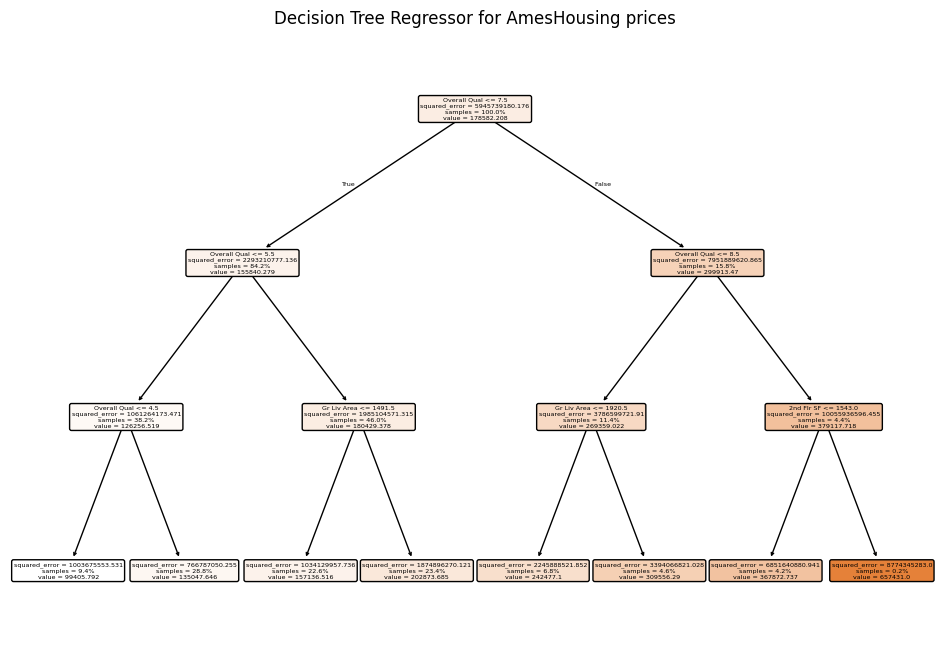

In [47]:
model = DecisionTreeRegressor(max_depth=3 , random_state = 42)
model.fit(Xtrain,Ytrain)
y_pred = model.predict(Xtest)

MSE = mean_squared_error(Ytest , y_pred)
R2 = r2_score(Ytest , y_pred)

print("Decision tree RMSE:", round(np.sqrt(MSE),2))
print("Decision tree R2:", R2)


feature_names = X.columns
# Plot the tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=feature_names, filled=True,
          rounded=True, proportion=True)
plt.title("Decision Tree Regressor for AmesHousing prices")
plt.show()

Decision tree RMSE: 33218.36
Decision tree R2: 0.8623694485215121


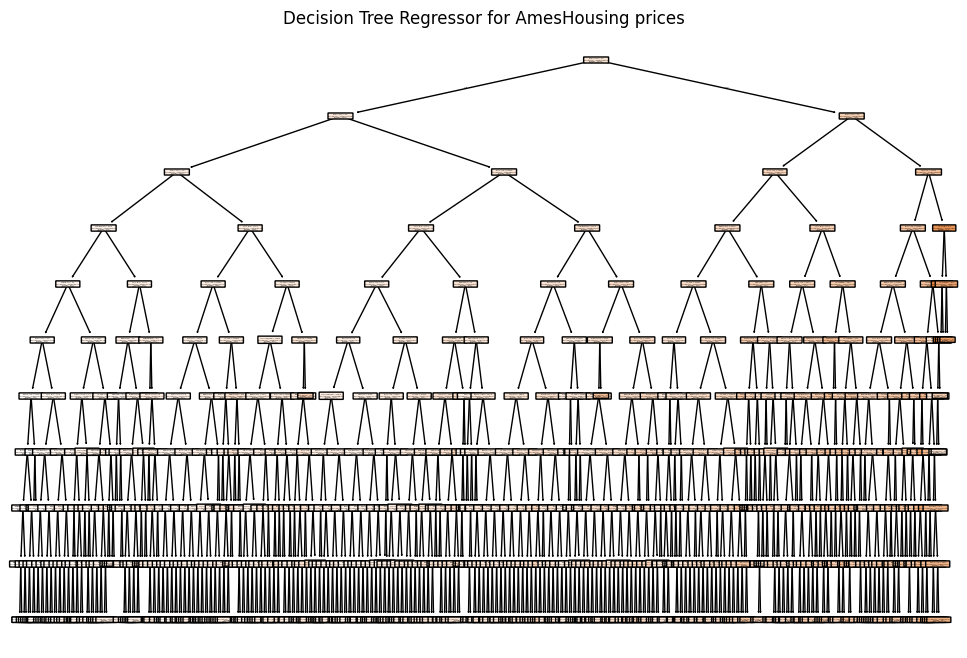

In [49]:
model = DecisionTreeRegressor(max_depth=10 , random_state = 42)
model.fit(Xtrain,Ytrain)
y_pred = model.predict(Xtest)

MSE = mean_squared_error(Ytest , y_pred)
R2 = r2_score(Ytest , y_pred)

print("Decision tree RMSE:", round(np.sqrt(MSE),2))
print("Decision tree R2:", R2)


feature_names = X.columns
# Plot the tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=feature_names, filled=True,
          rounded=True, proportion=True)
plt.title("Decision Tree Regressor for AmesHousing prices")
plt.show()